# Analyse Exploratoire des données des machines industrielles à l'aide de Jupyter Notebook

Pour bien comprendre les données de l'API [Google](https://www.google.com "Go to Google") on effectue **une Analyse Exploratoire des Données** des machines industrielles:  
Ce notebook effectue les opérations principales suivantes :

**Inspection des données** : Echantillonnage et inspection pour comprendre la structure et la qualité. 

**Analyse des valeurs manquantes** : Vérification des colonnes sans valeurs manquantes. 

**Analyse de distribution** : Analyse des variables numériques et catégoriques. 

**Analyse de corrélation** : Étude des relations entre les variables numériques. 

**Analyse des relations** : Exploration des interactions entre variables clés via des graphiques de dispersion.

# Lecture des données

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('predictive_maintenance.csv')

In [7]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9766,9767,H39180,H,298.6,309.6,1449,42.5,16,0,No Failure
5591,5592,L52771,L,302.5,312.0,1574,33.8,63,0,No Failure
121,122,L47301,L,298.9,308.7,1558,41.2,110,0,No Failure
3905,3906,M18765,M,302.2,311.2,1561,34.9,106,0,No Failure
9528,9529,M24388,M,299.1,310.3,1233,59.0,81,0,No Failure
7032,7033,L54212,L,300.7,310.9,1723,31.0,73,0,No Failure
4415,4416,L51595,L,302.6,310.4,1514,42.7,75,0,No Failure
8444,8445,M23304,M,298.6,309.9,1818,24.9,9,0,No Failure
9767,9768,L56947,L,298.6,309.6,1563,35.0,21,0,No Failure
7250,7251,M22110,M,300.1,310.2,1429,42.0,206,0,No Failure


In [8]:
machines_data=pd.read_csv('predictive_maintenance.csv')

# Analyse de distribution des types de défaillances

In [9]:
# Calculate the value counts
failure_counts = machines_data["Failure Type"].value_counts()

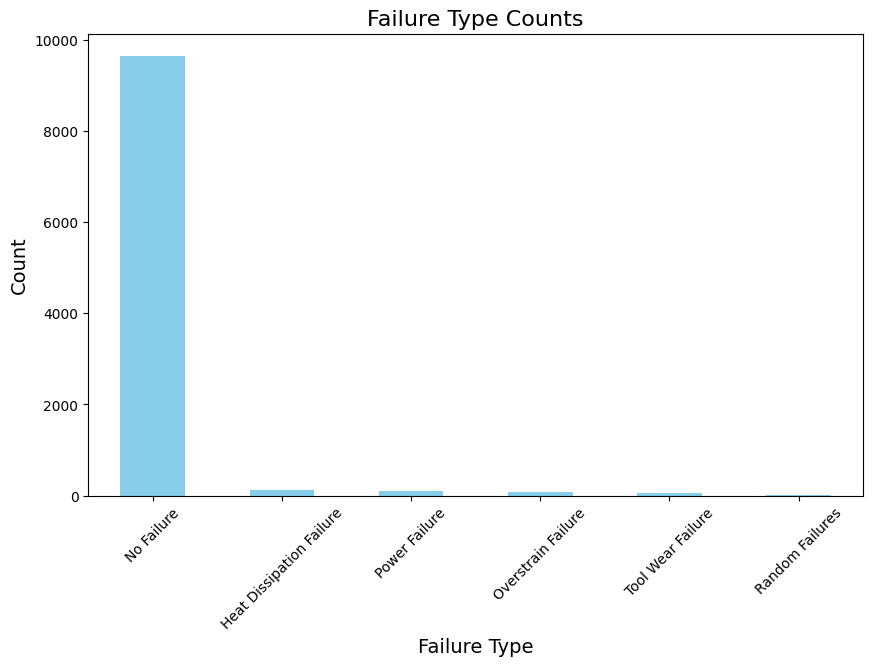

In [10]:
# Plot the value counts as a bar chart
plt.figure(figsize=(10, 6))
failure_counts.plot(kind="bar", color="skyblue")
plt.title("Failure Type Counts", fontsize=16)
plt.xlabel("Failure Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Analyser la distribution des valeurs dans chaque colonne Normalité, Asymétrie

<function matplotlib.pyplot.show(close=None, block=None)>

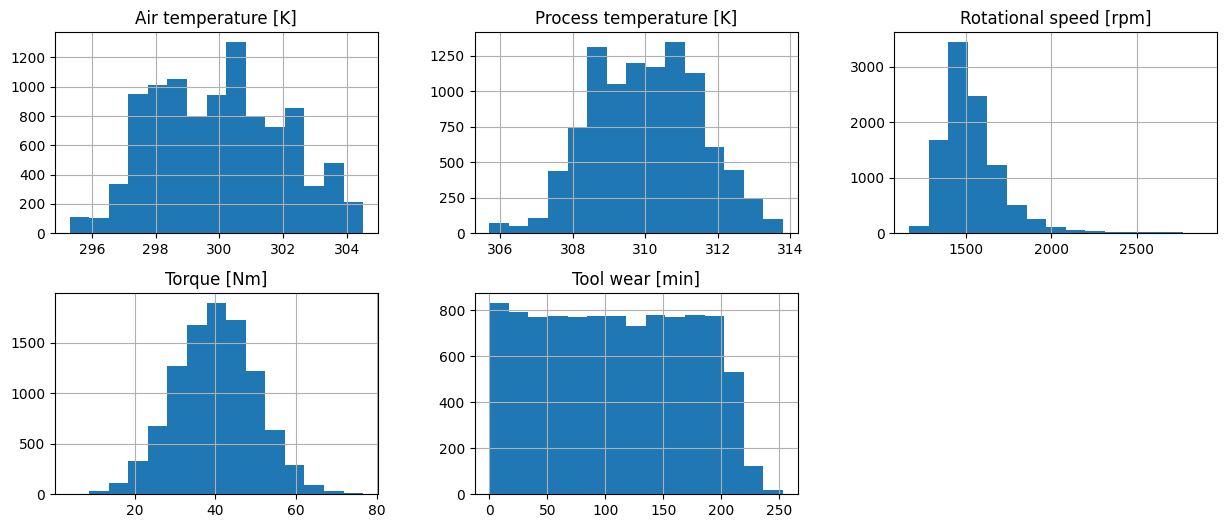

In [14]:
numerical_features=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
machines_data[numerical_features].hist(bins=15, figsize=(15,6),layout=(2,3))
plt.show

# Vérification des valeurs manquantes

In [15]:
machines_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [16]:
machines_data.sample(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
818,819,L47998,L,296.8,307.6,1304,48.7,142,0,No Failure
8142,8143,M23002,M,299.7,311.0,1448,49.8,80,0,No Failure
9575,9576,M24435,M,299.6,310.8,1603,35.4,202,0,No Failure


# Calculer et visualise la matrice de corrélation des variables numériques.

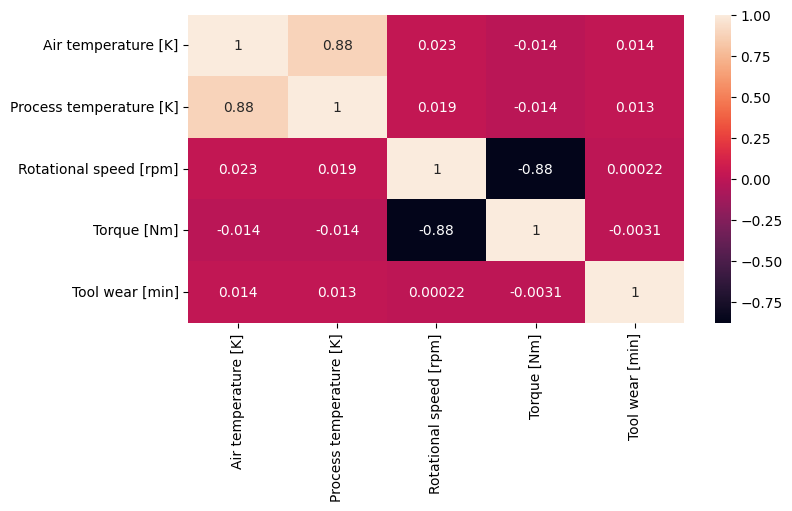

In [17]:
corr= machines_data[numerical_features].corr()
plt.figure(figsize = (8,4))
sns.heatmap(corr,annot=True)
plt.show()

# Calcule des statistiques résumées (moyenne, écart-type, percentiles, etc.) pour les variables numériques

In [18]:
machines_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


# Comprendre la relation entre le type de machine et le type de défaillance
 Trace la distribution des types de machines (L, M, H) et de leurs défaillances associées

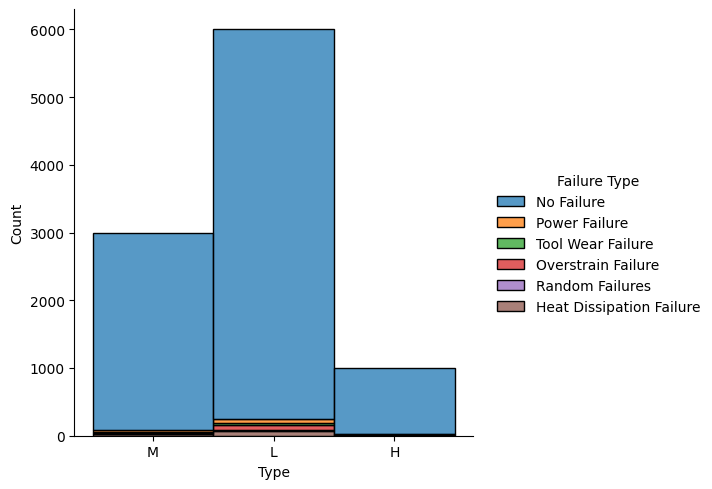

In [36]:
sns.displot(machines_data,x='Type',hue='Failure Type', multiple="stack")

## Identifier les variables catégoriques, les identifiants uniques et les redondances éventuelles.

In [38]:
machines_data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

## Les occurrences de chaque type de machine (L, M, H

In [40]:
machines_data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

# Relationplot entre the Rotational speed & Tool wear: Vitesse de rotation & Usure de l’outil¶

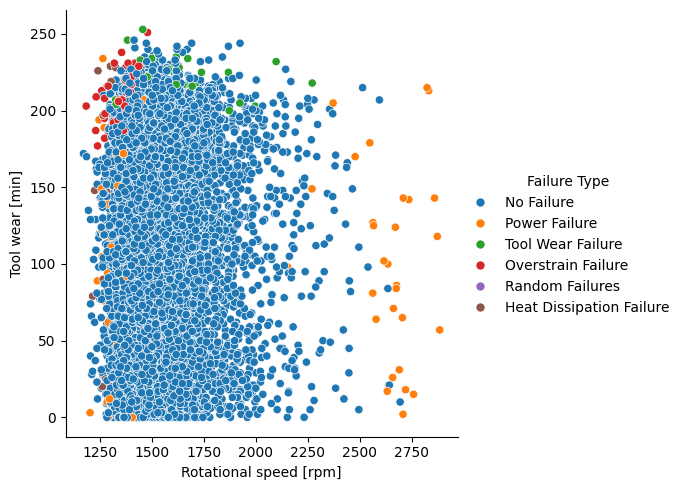

In [42]:
sns.relplot(y='Tool wear [min]',x='Rotational speed [rpm]',hue="Failure Type", data=machines_data)

# Relational plot entre the Rotational speed & Torque : Vitesse de rotation & Couple¶

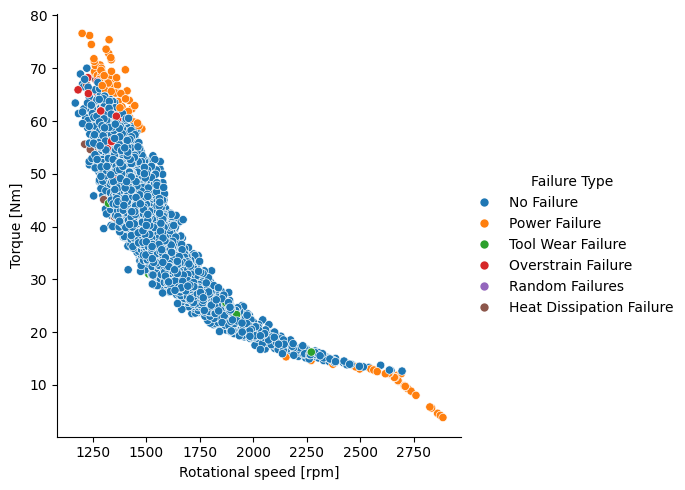

In [45]:
sns.relplot(y='Torque [Nm]',x='Rotational speed [rpm]',hue="Failure Type", data=machines_data)

# Relational Plot entre Rotational Speed and Process temperature: Vitesse de rotation & Température du processus

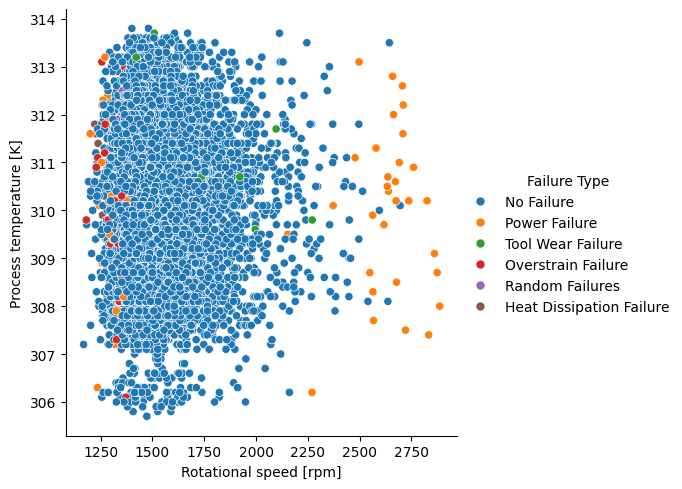

In [46]:
sns.relplot(y='Process temperature [K]',x='Rotational speed [rpm]',hue="Failure Type", data=machines_data)